<a href="https://colab.research.google.com/github/Masei25/JavaScript/blob/master/AccidentData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import math
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_accident = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big Data/Road Safety Data - Accidents 2019.csv')
data_casualty = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big Data/Road Safety Data - Casualties 2019.csv')
data_vehicle = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big Data/Road Safety Data- Vehicles 2019.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

In [ ]:
predictors = ["Weather_Conditions", "Speed_limit", "Road_Surface_Conditions", "Light_Conditions", "Pedestrian_Crossing-Human_Control"]

In [ ]:
usethis = data.dropna()
usethis.reset_index(drop=True)
usethis

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111847,201963DF02919,326180.0,316370.0,-3.094841,52.739912,63,1,3,2,17/08/2019,...,0,0,1,1,1,0,0,2,1,W01000457
111848,201963DF03019,309990.0,271620.0,-3.322442,52.335266,63,1,3,2,25/08/2019,...,0,0,1,1,1,0,0,2,1,W01000427
111849,201963DF03319,297250.0,290970.0,-3.515306,52.506924,63,1,1,1,22/09/2019,...,0,0,4,2,2,0,0,2,1,W01000429
111850,201963DF03419,286940.0,245670.0,-3.651922,52.097790,63,1,1,2,05/10/2019,...,0,0,1,1,1,0,0,2,1,W01000471


In [ ]:
usethis = usethis.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions', 'Accident_Severity', 'Pedestrian_Crossing-Human_Control'], axis=1)

In [ ]:
usethisnow = usethis[(usethis['Weather_Conditions']>0) & (usethis['Speed_limit']>0) & (usethis['Road_Surface_Conditions']>0) & (usethis['Light_Conditions']>0) & (usethis['Pedestrian_Crossing-Human_Control']>0)]

In [ ]:
usethisnow

,Weather_Conditions,Speed_limit,Road_Surface_Conditions,Light_Conditions,Accident_Severity,Pedestrian_Crossing-Human_Control
22,1,30,1,1,3,2
27,1,20,1,4,2,1
126,1,30,1,1,3,2
133,1,30,1,4,3,1
139,1,30,1,4,3,1
...,...,...,...,...,...,...
110220,1,20,1,1,3,1
110459,1,30,1,1,3,1
110590,1,30,2,1,3,1
110842,1,50,1,1,3,2


In [ ]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["Accident_Severity"])

SelectKBest(k='all')

In [ ]:
# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

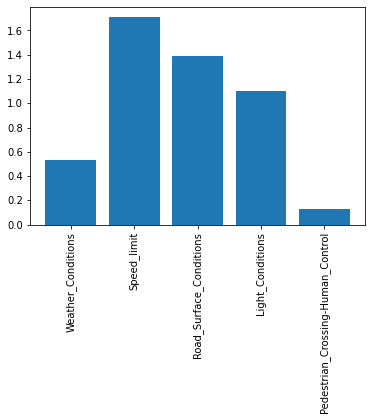

In [ ]:
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [ ]:
vehicle_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Road Safety Data- Vehicles 2019.csv')
vehicle_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,...,5,1,78,11,1597,2,6,8,3,8


In [ ]:
vehicle_data.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [ ]:
v_usethis = vehicle_data.dropna()
v_usethis.reset_index(drop=True)
v_usethis

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,...,5,1,78,11,1597,2,6,8,3,8


In [ ]:
v_predictors = ["Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle"]

In [ ]:
v_usethis = v_usethis.filter(["Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle"], axis=1)

In [ ]:
v_usethisnow = v_usethis[(v_usethis['Vehicle_Type']>0) & (v_usethis['Sex_of_Driver']>0) & (v_usethis['Age_of_Driver']>0) & (v_usethis['Engine_Capacity_(CC)']>0) & (v_usethis['Age_of_Vehicle']>0)]

In [ ]:
v_usethisnow

,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
15,9,2,81,1242,4
21,19,1,33,2198,4
24,9,1,30,1499,1
105,9,1,23,2996,1
181,3,1,25,125,1
...,...,...,...,...,...
216376,19,1,20,2198,4
216377,9,1,33,1997,12
216378,9,1,61,2967,5
216379,9,1,78,1597,6


In [ ]:
# Perform the feature selection
v_selector = SelectKBest(f_classif, k="all")
v_selector.fit(v_usethisnow[v_predictors], v_usethisnow["Sex_of_Driver"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

In [ ]:
# Here we will get the p-values for each feature and then transform from p-values into some scores
v_scores = -np.log10(v_selector.pvalues_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


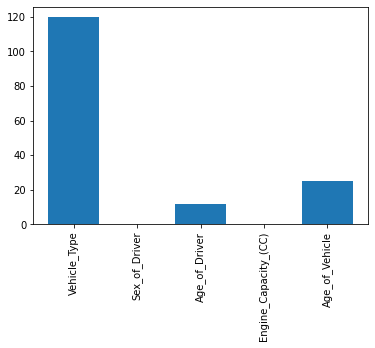

In [ ]:
plt.bar(range(len(v_predictors)), v_scores)
plt.xticks(range(len(v_predictors)), v_predictors, rotation='vertical')
plt.show()